In [238]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go


In [471]:
import statsmodels.api as sm

In [33]:
from datetime import datetime


In [949]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [999]:
from statsmodels.graphics.gofplots import qqplot


In [1032]:
from scipy import stats

In [1704]:
from scipy.stats import chi2_contingency as chi2_contingency

In [10]:
#Importation des fichiers csv enregistré sous excel: 
##Importation du fichier 
df_customers = pd.read_excel("/Users/helmisaddem/Documents/customers.xlsx")


In [17]:
df_products = pd.read_excel("/Users/helmisaddem/Documents/products.xlsx")

In [23]:
df_transactions = pd.read_excel("/Users/helmisaddem/Documents/Transactions.xlsx")

In [ ]:
df_transactions.info()

In [29]:
len(df_transactions["date"].unique())

687419

In [12]:
df_customers.rename(columns = {'sex':'gender',
                               'birth':'year_of_birth'} , inplace = True)


In [16]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      8621 non-null   object
 1   gender         8621 non-null   object
 2   year_of_birth  8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [39]:
len(df_customers["client_id"].unique())

8621

In [1420]:
len(df_customers.loc[df_customers["gender"] == 'm'])

4131

In [1425]:
round((len(df_customers.loc[df_customers["gender"] == 'm']) * 100/len(df_customers)),2)

47.92

In [1426]:
fig11 = go.Figure(data= go.Pie(labels=["F", "H"], 
        values=[4490, 4131]),
layout_title_text="distribution des clients en fonction du genre")
fig11.update_traces(marker=dict(colors=['tomato', 'slategray']))
fig11.update_layout(
        title_font_size=12,
        width=400,
        height=400)

       

In [34]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   product_id  687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [38]:
len(df_transactions["client_id"].unique())

8600

In [73]:
df_transactions["date"] = df_transactions["date"].astype('string')

In [31]:
df_products.rename(columns = {'id_prod':'product_id'} , inplace = True)

In [32]:
df_transactions.rename(columns = {'id_prod':'product_id'} , inplace = True)

In [112]:
df_transactions.rename(columns = {'date_duree_transaction':'date_heure_transaction'} , inplace = True)

In [83]:
df_transactions["date_transaction"] = ""

In [85]:
for i in range(len(df_transactions)):
    df_transactions.iloc[i,5] = df_transactions.iloc[i,1].split(' ')[0]

In [89]:
df_transactions["date_transaction"] = df_transactions["date_transaction"].astype('datetime64[ns]')

In [253]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   product_id              687534 non-null  object        
 1   date_heure_transaction  687534 non-null  string        
 2   session_id              687534 non-null  object        
 3   client_id               687534 non-null  object        
 4   transaction_id          687534 non-null  int64         
 5   date_transaction        687534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3), string(1)
memory usage: 31.5+ MB


In [254]:
df_merge = pd.merge(df_products, df_transactions, on= 'product_id', how='right')

In [660]:
df_final = pd.merge(df_merge, df_customers, on= 'client_id', how='left')

In [315]:
df_merge.head()

,product_id,price,categ,date_heure_transaction,session_id,client_id,transaction_id,date_transaction
0,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,1,2021-03-01
1,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,2,2021-03-01
2,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,3,2021-03-01
3,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,4,2021-03-01
4,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,5,2021-03-01


In [1065]:
df_final.head()

,product_id,price,categ,date_heure_transaction,session_id,client_id,transaction_id,date_transaction,gender,year_of_birth
0,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,1,2021-03-01,f,1967
1,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,2,2021-03-01,m,1960
2,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,3,2021-03-01,m,1988
3,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,4,2021-03-01,f,1989
4,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,5,2021-03-01,f,1956


In [714]:
identifiant_client = df_final["client_id"].unique().tolist()

In [730]:
import calendar

In [771]:
list_month = pd.date_range('2021-03-01','2023-02-28', 
              freq='MS').strftime("%Y-%m-%d")

In [1429]:
moy_panier_client = pd.DataFrame({'client_id': identifiant_client,
                              'moy_panier_mars_2021': 0.0,
                              'moy_panier_avril_2021': 0.0,
                              'moy_panier_mai_2021': 0.0,
                              'moy_panier_juin_2021': 0.0,
                              'moy_panier_juillet_2021': 0.0,
                              'moy_panier_aout_2021': 0.0,
                              'moy_panier_septembre_2021': 0.0,
                              'moy_panier_octobre_2021': 0.0,
                              'moy_panier_novembre_2021': 0.0,
                              'moy_panier_decembre_2021': 0.0,
                              'moy_panier_janvier_2022': 0.0,
                              'moy_panier_fevrier_2022': 0.0,
                              'moy_panier_mars_2022': 0.0,
                              'moy_panier_avril_2022': 0.0,
                              'moy_panier_mai_2022': 0.0,
                              'moy_panier_juin_2022': 0.0,
                              'moy_panier_juillet_2022': 0.0,
                              'moy_panier_aout_2022': 0.0,
                              'moy_panier_septembre_2022': 0.0,
                              'moy_panier_octobre_2022': 0.0,
                              'moy_panier_novembre_2022': 0.0,
                              'moy_panier_decembre_2022': 0.0,
                              'moy_panier_janvier_2023': 0.0,
                              'moy_panier_fevrier_2023': 0.0})

In [1430]:
#Table avec la moyenne du panier par client : 
for j in range(len(list_month)):
   
    datee = datetime.strptime(list_month[j], "%Y-%m-%d")
    month = datee.month
    year = datee.year
    first, last = calendar.monthrange(year, month)
    if month < 10: 
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    else:
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    for i in range(len(moy_panier_client)):
                    moy_panier_client.iloc[i,j+1] = round((df_month.loc[df_month.iloc[:,5] == moy_panier_client.iloc[i,0]]["price"].mean()),2)

In [1432]:
moy_panier_client.fillna(0, inplace=True)

In [1434]:
moy_panier_client = pd.merge(moy_panier_client, df_customers, on="client_id", how="left")

In [1435]:
moy_panier_client["age"] = 2023 - moy_panier_client["year_of_birth"]

In [1436]:
moy_panier_client.head()

,client_id,moy_panier_mars_2021,moy_panier_avril_2021,moy_panier_mai_2021,moy_panier_juin_2021,moy_panier_juillet_2021,moy_panier_aout_2021,moy_panier_septembre_2021,moy_panier_octobre_2021,moy_panier_novembre_2021,...,moy_panier_aout_2022,moy_panier_septembre_2022,moy_panier_octobre_2022,moy_panier_novembre_2022,moy_panier_decembre_2022,moy_panier_janvier_2023,moy_panier_fevrier_2023,gender,year_of_birth,age
0,c_329,15.02,15.99,0.00,26.10,22.42,0.00,19.23,3.99,20.99,...,0.00,15.99,19.80,3.73,21.32,18.68,16.33,f,1967,56
1,c_664,27.96,12.64,13.99,21.55,22.39,17.24,19.49,15.21,23.12,...,15.03,13.23,8.50,22.39,16.17,26.08,24.21,m,1960,63
2,c_580,12.13,14.17,11.58,8.35,13.31,12.81,14.47,14.40,13.50,...,11.80,12.90,17.24,13.16,12.66,12.97,12.26,m,1988,35
3,c_7912,14.60,10.30,13.55,12.05,21.72,9.80,10.07,12.79,13.01,...,13.78,19.29,12.36,11.74,14.19,15.03,8.84,f,1989,34
4,c_2033,22.01,17.09,7.05,17.67,20.99,9.99,8.99,27.99,20.03,...,17.97,11.12,13.43,0.00,18.38,12.19,17.38,f,1956,67


In [1437]:
moy_panier_client["moy_panier_total"] = 0

In [1438]:
for i in range(len(moy_panier_client)):
    for j in range(1,25):
        moy_panier_client.iloc[i,28] = moy_panier_client.iloc[i,28] + moy_panier_client.iloc[i,j]

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_79914/2732073182.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.02' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [1440]:
moy_panier_client["moy_panier_total"] = round((moy_panier_client["moy_panier_total"] / 24),2)

In [1441]:
moy_panier_client.head()

,client_id,moy_panier_mars_2021,moy_panier_avril_2021,moy_panier_mai_2021,moy_panier_juin_2021,moy_panier_juillet_2021,moy_panier_aout_2021,moy_panier_septembre_2021,moy_panier_octobre_2021,moy_panier_novembre_2021,...,moy_panier_septembre_2022,moy_panier_octobre_2022,moy_panier_novembre_2022,moy_panier_decembre_2022,moy_panier_janvier_2023,moy_panier_fevrier_2023,gender,year_of_birth,age,moy_panier_total
0,c_329,15.02,15.99,0.00,26.10,22.42,0.00,19.23,3.99,20.99,...,15.99,19.80,3.73,21.32,18.68,16.33,f,1967,56,14.20
1,c_664,27.96,12.64,13.99,21.55,22.39,17.24,19.49,15.21,23.12,...,13.23,8.50,22.39,16.17,26.08,24.21,m,1960,63,19.92
2,c_580,12.13,14.17,11.58,8.35,13.31,12.81,14.47,14.40,13.50,...,12.90,17.24,13.16,12.66,12.97,12.26,m,1988,35,12.89
3,c_7912,14.60,10.30,13.55,12.05,21.72,9.80,10.07,12.79,13.01,...,19.29,12.36,11.74,14.19,15.03,8.84,f,1989,34,12.45
4,c_2033,22.01,17.09,7.05,17.67,20.99,9.99,8.99,27.99,20.03,...,11.12,13.43,0.00,18.38,12.19,17.38,f,1956,67,15.05


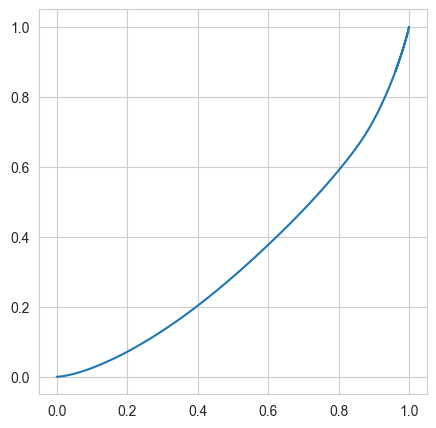

In [1442]:
plt.pyplot.figure(figsize=(5,5)) 
lorenz = np.cumsum(np.sort(moy_panier_client["moy_panier_total"]))/moy_panier_client["moy_panier_total"].sum()
lorenz = np.append([0],lorenz)
n = len(moy_panier_client)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.pyplot.plot(xaxis,lorenz,drawstyle='steps-post')
plt.pyplot.show()


In [1443]:
#Calcul de l'indice de Gini : 
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(gini)

#l'inégalité est d'autant plus forte que l'indice de Gini est élevé. 
# Il est égal à 0 dans une situation d'égalité parfaite où la variable prend une valeur identique sur 
# l'ensemble de la population

0.3277086428499363


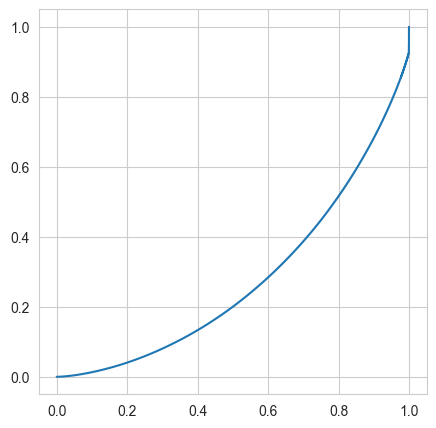

In [2030]:
plt.pyplot.figure(figsize=(5,5)) 
lorenz = np.cumsum(np.sort(CA_par_client["CA_total"]))/CA_par_client["CA_total"].sum()
lorenz = np.append([0],lorenz)
n = len(CA_par_client)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.pyplot.plot(xaxis,lorenz,drawstyle='steps-post')
plt.pyplot.show()


In [2031]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(gini)

0.4454126346005266


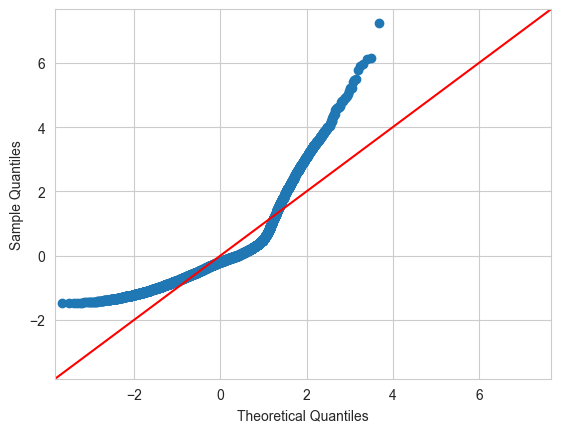

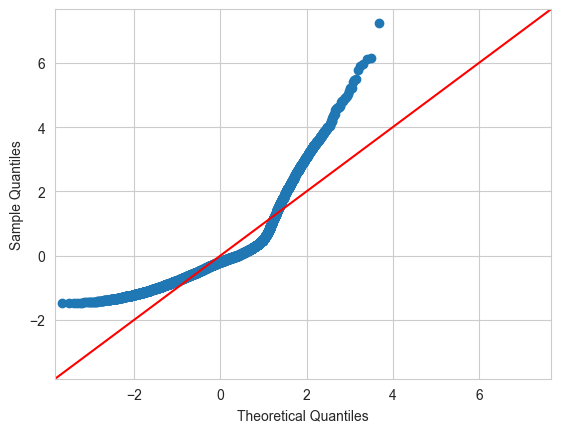

In [1793]:
sm.qqplot(moy_panier_client["moy_panier_total"], line='45', fit=True)

In [2029]:
CA_par_client["CA_total"].sum()

10886783.59

In [1794]:
from statsmodels.graphics.gofplots import qqplot_2samples


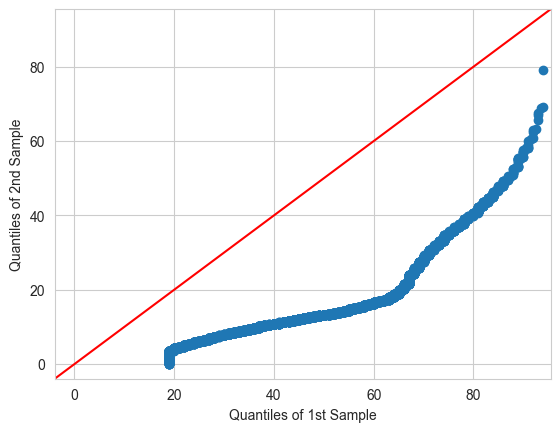

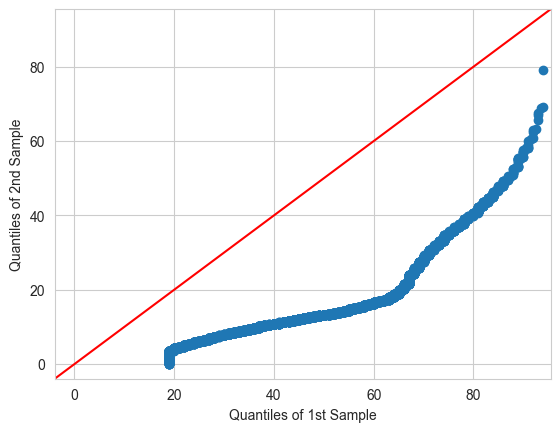

In [1796]:
pp_x = sm.ProbPlot(2023 - df_customers["year_of_birth"])
pp_y = sm.ProbPlot(moy_panier_client["moy_panier_total"])
qqplot_2samples(pp_x, pp_y, line='45') 

<Axes: xlabel='age', ylabel='moy_panier_total'>

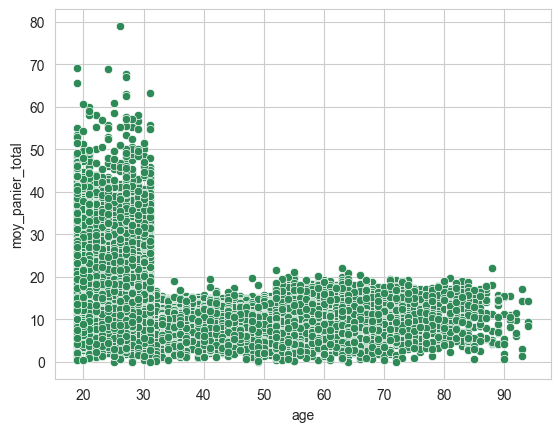

In [1751]:
sns.set_style='whitegrid'
sns.scatterplot(data=moy_panier_client,
    x="age",
    y="moy_panier_total", 
    color='seagreen')

In [1445]:
stats.spearmanr(moy_panier_client["age"], moy_panier_client["moy_panier_total"])

SignificanceResult(statistic=-0.2914441932878984, pvalue=5.519687008628242e-168)

In [1448]:
CA_par_client = pd.DataFrame({'client_id': identifiant_client,
                              'CA_client_mars_2021': 0.0,
                              'CA_client_avril_2021': 0.0,
                              'CA_client_mai_2021': 0.0,
                              'CA_client_juin_2021': 0.0,
                              'CA_client_juillet_2021': 0.0,
                              'CA_client_aout_2021': 0.0,
                              'CA_client_septembre_2021': 0.0,
                              'CA_client_octobre_2021': 0.0,
                              'CA_client_novembre_2021': 0.0,
                              'CA_client_decembre_2021': 0.0,
                              'CA_client_janvier_2022': 0.0,
                              'CA_client_fevrier_2022': 0.0,
                              'CA_client_mars_2022': 0.0,
                              'CA_client_avril_2022': 0.0,
                              'CA_client_mai_2022': 0.0,
                              'CA_client_juin_2022': 0.0,
                              'CA_client_juillet_2022': 0.0,
                              'CA_client_aout_2022': 0.0,
                              'CA_client_septembre_2022': 0.0,
                              'CA_client_octobre_2022': 0.0,
                              'CA_client_novembre_2022': 0.0,
                              'CA_client_decembre_2022': 0.0,
                              'CA_client_mars_2021': 0.0,
                              'CA_client_janvier_2023': 0.0,
                              'CA_client_fevrier_2023': 0.0})


In [1449]:
# pour construire la table CA par produit et par client : 
for j in range(len(list_month)):
   
    datee = datetime.strptime(list_month[j], "%Y-%m-%d")
    month = datee.month
    year = datee.year
    first, last = calendar.monthrange(year, month)
    if month < 10: 
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    else:
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    for i in range(len(CA_par_client)):
                    CA_par_client.iloc[i,j+1] = round((df_month.loc[df_month.iloc[:,5] == CA_par_client.iloc[i,0]]["price"].sum()),2)

      



In [1450]:
CA_par_client = pd.merge(CA_par_client, df_customers, on="client_id", how="left") 

In [1451]:
CA_par_client["age"] = 2023 - CA_par_client["year_of_birth"]

In [1452]:
CA_par_client["CA_total"] = 0

In [1453]:
for i in range (len(CA_par_client)):
    for j in range(1,25):
        CA_par_client.iloc[i,28] = CA_par_client.iloc[i,28] + CA_par_client.iloc[i,j]


/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_79914/989841997.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '60.08' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [1807]:
CA_par_client.nlargest(4, "CA_total").iloc[0,1:25].sum()

,client_id,CA_client_mars_2021,CA_client_avril_2021,CA_client_mai_2021,CA_client_juin_2021,CA_client_juillet_2021,CA_client_aout_2021,CA_client_septembre_2021,CA_client_octobre_2021,CA_client_novembre_2021,...,CA_client_septembre_2022,CA_client_octobre_2022,CA_client_novembre_2022,CA_client_decembre_2022,CA_client_janvier_2023,CA_client_fevrier_2023,gender,year_of_birth,age,CA_total
6,c_1609,13740.67,11972.62,12037.61,11807.05,9279.51,9377.54,16666.96,11139.92,14198.61,...,12981.90,11450.35,13212.44,13208.96,10189.75,11145.73,m,1980,43,298076.59
107,c_4958,12073.43,11293.84,11191.03,13634.47,13414.09,12737.74,6413.62,6325.78,11096.49,...,9972.90,11189.73,12519.86,11697.94,8308.10,10975.64,m,1999,24,265154.04
135,c_6714,6194.25,5731.28,5460.85,6470.91,4885.12,3662.38,6768.19,3690.51,7471.30,...,4635.84,5404.43,6650.56,6980.62,5890.10,5729.56,f,1968,55,138438.08
32,c_3454,4513.55,3966.85,4126.84,3694.11,3539.93,3215.14,4504.26,1848.19,5309.25,...,4196.64,4005.16,3992.75,4391.57,4072.59,4384.54,m,1969,54,103071.24


In [1833]:
BtoB_CA = CA_par_client.nlargest(100, "CA_total").head(4).reset_index()

In [1911]:
BtoB_CA["CA_total"].sum()

804739.95

In [1912]:
CA_par_client["CA_total"].sum()

10886783.59

In [2032]:
stats.spearmanr(CA_par_client["age"], CA_par_client["CA_total"])

SignificanceResult(statistic=-0.18101396337024364, pvalue=2.989403913881456e-64)

In [ ]:
#color = ['violet']* 8600
#go.Figure(data=go.Scatter(
    #x = CA_par_client["age"],
    #y= CA_par_client["CA_total"],
    #mode = 'markers',
    #marker_color=color))

In [ ]:
sns.set_style='whitegrid'
sns.scatterplot(data=CA_par_client,
    x="age",
    y="CA_total", 
    color='violet')

In [1834]:
BtoB_CA.head()

,index,client_id,CA_client_mars_2021,CA_client_avril_2021,CA_client_mai_2021,CA_client_juin_2021,CA_client_juillet_2021,CA_client_aout_2021,CA_client_septembre_2021,CA_client_octobre_2021,...,CA_client_septembre_2022,CA_client_octobre_2022,CA_client_novembre_2022,CA_client_decembre_2022,CA_client_janvier_2023,CA_client_fevrier_2023,gender,year_of_birth,age,CA_total
0,6,c_1609,13740.67,11972.62,12037.61,11807.05,9279.51,9377.54,16666.96,11139.92,...,12981.90,11450.35,13212.44,13208.96,10189.75,11145.73,m,1980,43,298076.59
1,107,c_4958,12073.43,11293.84,11191.03,13634.47,13414.09,12737.74,6413.62,6325.78,...,9972.90,11189.73,12519.86,11697.94,8308.10,10975.64,m,1999,24,265154.04
2,135,c_6714,6194.25,5731.28,5460.85,6470.91,4885.12,3662.38,6768.19,3690.51,...,4635.84,5404.43,6650.56,6980.62,5890.10,5729.56,f,1968,55,138438.08
3,32,c_3454,4513.55,3966.85,4126.84,3694.11,3539.93,3215.14,4504.26,1848.19,...,4196.64,4005.16,3992.75,4391.57,4072.59,4384.54,m,1969,54,103071.24


In [1832]:
go.Figure(data=go.Pie(labels= ['c_1609', 'c_4958', 'c_6714', 'c_3454', 'autres clients'], 
        values= [2.73, 2.43, 1.27, 0.94, 92.63]),
layout_title_text="Part des CA des clients BtoB du CA total").update_layout(
        title_font_size=12,
        width=500,
        height=400).update_traces(
                marker=dict(colors=['darkorchid', 'palevioletred', 'plum', 'skyblue', 'lightsteelblue']))

In [1928]:
df = pd.DataFrame({
                   'c_1609': BtoB_CA.iloc[0,1:26],
                   'c_4958': BtoB_CA.iloc[1,1:26],
                   'c_6714': BtoB_CA.iloc[2,1:26],
                   'c_3454': BtoB_CA.iloc[3,1:26]
                   })


In [1929]:
df = df.reset_index()

In [1930]:
df = df.drop(columns=["index"])

In [1931]:
df = df.drop(0)

In [1932]:
df = df.reset_index()

In [1934]:
df = df.drop(columns=["index"])

In [1935]:
df["period"] = period

In [1938]:
df.head()

,c_1609,c_4958,c_6714,c_3454,period,CA_total_btob
0,13740.67,12073.43,6194.25,4513.55,Mar-21,0
1,11972.62,11293.84,5731.28,3966.85,Apr-21,0
2,12037.61,11191.03,5460.85,4126.84,May-21,0
3,11807.05,13634.47,6470.91,3694.11,Jun-21,0
4,9279.51,13414.09,4885.12,3539.93,Jul-21,0


In [1937]:
df["CA_total_btob"] = 0

In [ ]:
for i in range(len(df)): 
    df.iloc[i,5] =  df.iloc[i,0:4].sum()
    

In [1947]:
df["CA_total"] = evolut_catego["CA_total"]

In [1948]:
df.head()

,c_1609,c_4958,c_6714,c_3454,period,CA_total_btob,CA_total
0,13740.67,12073.43,6194.25,4513.55,Mar-21,36521.90,482440.61
1,11972.62,11293.84,5731.28,3966.85,Apr-21,32964.59,429113.16
2,12037.61,11191.03,5460.85,4126.84,May-21,32816.33,413862.24
3,11807.05,13634.47,6470.91,3694.11,Jun-21,35606.54,467689.41
4,9279.51,13414.09,4885.12,3539.93,Jul-21,31118.65,433173.21


In [1973]:
px.bar(df, x="period", 
              y=["CA_total_btob", "CA_total"], color_discrete_sequence= px.colors.qualitative.Vivid, width= 800, barmode="stack",
             title="CA BtoB par rapport au CA total")

In [1968]:
df_1 = pd.DataFrame({"x_axis":"periode totale",
                     "CA_total_btob": [df["CA_total_btob"].sum()],
                     "CA_total": [df["CA_total"].sum()]})



In [1972]:
print(df["CA_total_btob"].sum(),
df["CA_total"].sum())

804739.95 10886783.59


In [1970]:
px.bar(df_1, x="x_axis",
              y=["CA_total_btob", "CA_total"], color_discrete_sequence= px.colors.qualitative.Vivid, width= 350, barmode="stack",
             title="CA BtoB par rapport au CA total")


In [ ]:
sns.set_style='whitegrid'
sns.scatterplot(data=df,
    x="age",
    y="CA_total", 
    color='violet')

In [1456]:
stats.anderson(CA_par_client["CA_total"], dist='norm')

AndersonResult(statistic=2138.5248786011507, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1265.9050686046512, scale=4744.906161558257)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [1415]:
df_final.loc[(df_final['date_transaction'] >= '2021-03-01')
                     & (df_final['date_transaction'] <= '2021-03-31')].loc[df_final["client_id"] == 'c_1609']

,product_id,price,categ,date_heure_transaction,session_id,client_id,transaction_id,date_transaction,gender,year_of_birth
6,0_1304,5.86,0,2021-03-01 00:07:04.371179,s_7,c_1609,7,2021-03-01,m,1980
13,0_1159,7.99,0,2021-03-01 00:11:57.832228,s_7,c_1609,14,2021-03-01,m,1980
78,0_1425,12.99,0,2021-03-01 01:56:41.944044,s_46,c_1609,79,2021-03-01,m,1980
88,0_1469,14.99,0,2021-03-01 02:12:21.294004,s_53,c_1609,89,2021-03-01,m,1980
101,1_406,24.81,1,2021-03-01 02:41:13.649521,s_63,c_1609,102,2021-03-01,m,1980
...,...,...,...,...,...,...,...,...,...,...
28581,0_1042,18.53,0,2021-03-31 23:28:50.975115,s_14195,c_1609,28582,2021-03-31,m,1980
28585,1_660,22.23,1,2021-03-31 23:36:39.178171,s_14199,c_1609,28586,2021-03-31,m,1980
28589,0_1525,6.99,0,2021-03-31 23:44:24.515328,s_14195,c_1609,28590,2021-03-31,m,1980
28592,0_1428,3.55,0,2021-03-31 23:47:32.661703,s_14199,c_1609,28593,2021-03-31,m,1980


In [481]:
period = pd.date_range('2021-03-01','2023-02-28', 
              freq='M').strftime("%b-%y").tolist()
#

In [1459]:
#nombre de client par mois: 
nombre_client = pd.DataFrame({'periode': period,
                              'nbre_client':0})


In [1460]:
for j in range(len(list_month)):
   
    datee = datetime.strptime(list_month[j], "%Y-%m-%d")
    month = datee.month
    year = datee.year
    first, last = calendar.monthrange(year, month)
    if month < 10: 
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    else:
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    nombre_client.iloc[j,1] = len(df_month.groupby("client_id").agg({'product_id':'count'}).reset_index())
  
                    

In [1478]:
nombre_client["nbre_reference"]=0

In [1482]:
nombre_client["nbre_produit"]=0

In [ ]:
#scatter et moyenne mobile du nombre de clients par mois 
px.line(nombre_client, 
              x="periode", 
              y="nbre_client", 
              markers=True,
              title='evolution du nombre de clients', color_discrete_sequence= px.colors.qualitative.G10)

In [1484]:
#nombre de références vendues : 
for j in range(len(list_month)):
   
    datee = datetime.strptime(list_month[j], "%Y-%m-%d")
    month = datee.month
    year = datee.year
    first, last = calendar.monthrange(year, month)
    if month < 10: 
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    else:
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
    df_month = df_month.groupby("product_id").agg({"product_id":"count"}).reset_index(names="count")
    nombre_client.iloc[j,2] = len(df_month)
    nombre_client.iloc[j,3] = df_month["product_id"].sum()


In [1485]:
nombre_client.head()

,periode,nbre_client,nbre_reference,nbre_produit
0,Mar-21,5676,2482,28601
1,Apr-21,5411,2439,25620
2,May-21,5186,2381,23715
3,Jun-21,5579,2391,25929
4,Jul-21,5418,2308,22179


In [1987]:
px.bar(nombre_client, x="periode", 
              y="nbre_client", color_discrete_sequence= px.colors.qualitative.Safe, width= 800, 
             title="Evolution du nombre de clients")

In [ ]:
#px.line(nombre_client, 
              #x="periode", 
              #y="nbre_reference",
              #markers=True,
              #title='evolution du nombre de references', color_discrete_sequence= px.colors.qualitative.G10)
                     

In [1984]:
px.bar(nombre_client, x="periode", 
              y="nbre_produit", color_discrete_sequence= px.colors.qualitative.Vivid, width= 800, 
             title="Evolution du nombre de produits vendus")

In [1498]:
window_size = 3
nombre_client["moving_average_client"] = nombre_client["nbre_client"].rolling(window=window_size).mean()
nombre_client["moving_average_reference"] = nombre_client["nbre_reference"].rolling(window=window_size).mean()
nombre_client["moving_average_produit"] = nombre_client["nbre_produit"].rolling(window=window_size).mean()


Text(0, 0.5, 'nombre de clients')

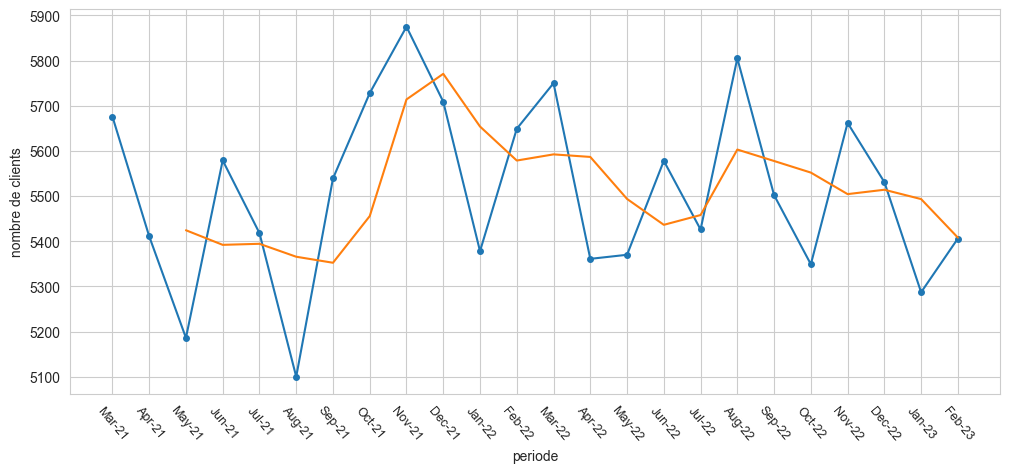

In [1988]:
# Plot the data and moving average of nombre de clients
plt.pyplot.figure(figsize=(12, 5))
plt.pyplot.plot(nombre_client["periode"], nombre_client["nbre_client"], marker='o', markersize=4)
plt.pyplot.plot(nombre_client["periode"], nombre_client["moving_average_client"])
plt.pyplot.xlabel('periode')
plt.pyplot.xticks(rotation = -50, fontsize=9)
plt.pyplot.ylabel("nombre de clients")

Text(0, 0.5, 'nombre de produits')

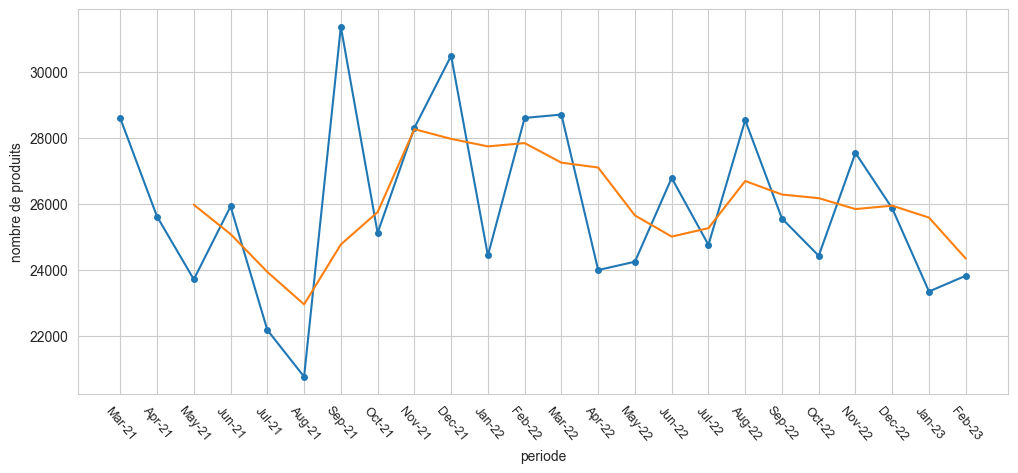

In [1789]:
#moving average de nombre de produits
plt.pyplot.figure(figsize=(12, 5))
plt.pyplot.plot(nombre_client["periode"], nombre_client["nbre_produit"], marker='o', markersize=4)
plt.pyplot.plot(nombre_client["periode"], nombre_client["moving_average_produit"])
plt.pyplot.xlabel('periode')
plt.pyplot.xticks(rotation = -50, fontsize=9)
plt.pyplot.ylabel("nombre de produits")

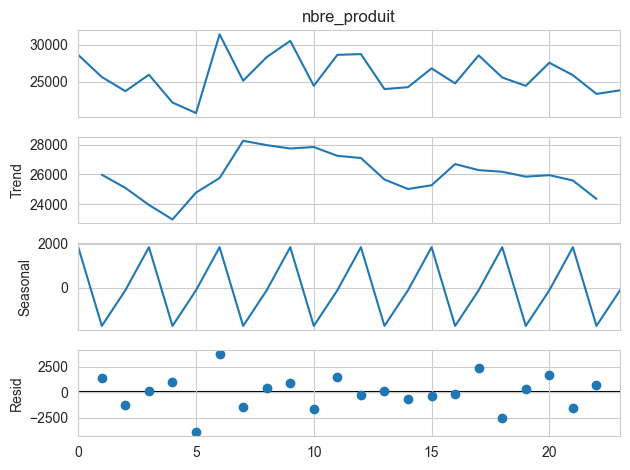

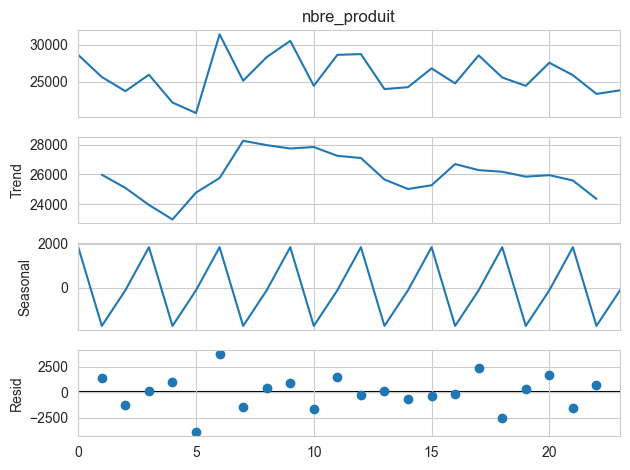

In [2058]:
result_2 = seasonal_decompose(nombre_client["nbre_produit"], model='additive', period=3)
result_2.plot()

In [1520]:
products = df_products["product_id"].to_list()

In [ ]:
#nombre de produits vendus par mois : 
datee = datetime.strptime(list_month[1], "%Y-%m-%d")
month = datee.month
year = datee.year
first, last = calendar.monthrange(year, month)
df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
df_month.loc[df_month["product_id"] == products[0]]

In [1529]:
df_produits = pd.DataFrame({"product_id" : products,
                                    "nbre_exemplaire_mars_21": 0,
                                    "nbre_exemplaire_avril_21": 0,
                                    "nbre_exemplaire_mai_21": 0,
                                    "nbre_exemplaire_juin_21": 0,
                                    "nbre_exemplaire_juillet_21": 0,
                                    "nbre_exemplaire_aout_21": 0,
                                    "nbre_exemplaire_septembre_21": 0,
                                    "nbre_exemplaire_octobre_21": 0,
                                    "nbre_exemplaire_novembre_21": 0,
                                    "nbre_exemplaire_decembre_21": 0,
                                    "nbre_exemplaire_janvier_22": 0,
                                    "nbre_exemplaire_fevrier_22": 0,
                                    "nbre_exemplaire_mars_22": 0,
                                    "nbre_exemplaire_avril_22": 0,
                                    "nbre_exemplaire_mai_22": 0,
                                    "nbre_exemplaire_juin_22": 0,
                                    "nbre_exemplaire_juillet_22": 0,
                                    "nbre_exemplaire_aout_22": 0,
                                    "nbre_exemplaire_septembre_22": 0,
                                    "nbre_exemplaire_octobre_22": 0,
                                    "nbre_exemplaire_novembre_22": 0,
                                    "nbre_exemplaire_decembre_22": 0,
                                    "nbre_exemplaire_janvier_23": 0,
                                    "nbre_exemplaire_fevrier_23": 0})



In [1531]:
for i in range (len(products)):
    for j in range(len(list_month)):
        datee = datetime.strptime(list_month[j], "%Y-%m-%d")
        month = datee.month
        year = datee.year
        first, last = calendar.monthrange(year, month)
        if month < 10: 
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
        else:
            df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
        
        df_produits.iloc[i,j+1] = len(df_month.loc[df_month["product_id"] == products[i]])   

In [1537]:
#merge avec df product pour avoir le prix de chaque produit
df_produits = pd.merge(df_produits, df_products, on="product_id", how="inner")

In [1538]:
df_produits.head(10)

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_juillet_22,nbre_exemplaire_aout_22,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ
0,0_1421,57,38,34,48,27,36,65,51,50,...,34,47,32,35,58,31,46,43,19.99,0
1,0_1368,46,45,24,32,25,31,56,33,27,...,28,40,25,31,36,37,37,20,5.13,0
2,0_731,1,2,1,0,1,0,1,1,0,...,0,2,0,0,1,0,0,0,17.99,0
3,1_587,4,1,2,4,4,4,6,3,5,...,1,7,10,4,8,5,3,3,4.99,1
4,0_1507,25,27,26,24,22,23,36,18,24,...,34,26,28,20,31,25,18,27,3.99,0
5,0_1163,27,14,16,24,14,18,22,21,14,...,17,18,8,10,19,24,17,15,9.99,0
6,1_463,0,0,1,1,0,1,0,2,2,...,1,1,1,0,1,3,1,1,36.99,1
7,0_2157,0,0,0,1,1,1,1,0,2,...,0,1,0,1,0,0,0,0,34.99,0
8,0_1915,3,6,2,3,2,1,6,2,4,...,2,0,2,4,1,2,0,2,16.99,0
9,0_389,0,0,1,4,1,2,2,1,1,...,0,1,1,2,1,1,0,1,18.99,0


In [1541]:
df_produits["CA_total_produit"] = 0

In [1546]:
for j in range(len(df_produits)): 
    for i in range(1, 25):
        df_produits.iloc[j,27] = round((df_produits.iloc[j,27] + (df_produits.iloc[j,i]*df_produits.iloc[j,25])),2)

In [1547]:
df_produits.head(10)

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_aout_22,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ,CA_total_produit
0,0_1421,57,38,34,48,27,36,65,51,50,...,47,32,35,58,31,46,43,19.99,0,41499.24
1,0_1368,46,45,24,32,25,31,56,33,27,...,40,25,31,36,37,37,20,5.13,0,8382.42
2,0_731,1,2,1,0,1,0,1,1,0,...,2,0,0,1,0,0,0,17.99,0,503.72
3,1_587,4,1,2,4,4,4,6,3,5,...,7,10,4,8,5,3,3,4.99,1,1057.88
4,0_1507,25,27,26,24,22,23,36,18,24,...,26,28,20,31,25,18,27,3.99,0,5051.34
5,0_1163,27,14,16,24,14,18,22,21,14,...,18,8,10,19,24,17,15,9.99,0,7972.02
6,1_463,0,0,1,1,0,1,0,2,2,...,1,1,0,1,3,1,1,36.99,1,1553.58
7,0_2157,0,0,0,1,1,1,1,0,2,...,1,0,1,0,0,0,0,34.99,0,629.82
8,0_1915,3,6,2,3,2,1,6,2,4,...,0,2,4,1,2,0,2,16.99,0,2344.62
9,0_389,0,0,1,4,1,2,2,1,1,...,1,1,2,1,1,0,1,18.99,0,1063.44


In [1548]:
df_produits.nlargest(100, "CA_total_produit").head(10)

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_aout_22,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ,CA_total_produit
1314,2_159,28,20,23,22,23,28,36,13,27,...,27,35,20,23,30,21,22,145.99,2,170516.32
2670,2_135,44,30,42,49,54,44,21,25,32,...,49,29,36,42,53,30,35,68.99,2,125147.86
465,2_112,27,39,51,43,45,46,22,33,26,...,31,34,38,34,50,38,45,67.57,2,117436.66
2345,2_102,33,29,34,42,47,46,31,23,41,...,40,42,39,36,35,43,46,59.14,2,109763.84
492,2_209,29,33,34,39,44,34,17,18,25,...,39,29,39,34,27,25,33,69.99,2,101765.46
1746,1_395,58,50,48,70,75,55,73,74,124,...,98,73,83,75,72,75,55,28.99,1,101696.92
2646,1_369,88,68,61,92,81,60,92,83,116,...,104,90,72,85,86,94,83,23.99,1,100518.10
3235,1_383,64,51,56,80,64,53,66,80,108,...,91,76,51,73,73,65,58,28.99,1,98508.02
2217,1_414,86,64,67,90,89,74,79,62,107,...,104,68,83,96,100,92,91,23.83,1,97178.74
2486,2_166,6,11,5,9,14,12,5,6,8,...,5,6,11,14,10,12,7,230.04,2,97076.88


In [1549]:
df_produits.sort_values(by="CA_total_produit", ascending=False).head(10)

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_aout_22,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ,CA_total_produit
1314,2_159,28,20,23,22,23,28,36,13,27,...,27,35,20,23,30,21,22,145.99,2,170516.32
2670,2_135,44,30,42,49,54,44,21,25,32,...,49,29,36,42,53,30,35,68.99,2,125147.86
465,2_112,27,39,51,43,45,46,22,33,26,...,31,34,38,34,50,38,45,67.57,2,117436.66
2345,2_102,33,29,34,42,47,46,31,23,41,...,40,42,39,36,35,43,46,59.14,2,109763.84
492,2_209,29,33,34,39,44,34,17,18,25,...,39,29,39,34,27,25,33,69.99,2,101765.46
1746,1_395,58,50,48,70,75,55,73,74,124,...,98,73,83,75,72,75,55,28.99,1,101696.92
2646,1_369,88,68,61,92,81,60,92,83,116,...,104,90,72,85,86,94,83,23.99,1,100518.10
3235,1_383,64,51,56,80,64,53,66,80,108,...,91,76,51,73,73,65,58,28.99,1,98508.02
2217,1_414,86,64,67,90,89,74,79,62,107,...,104,68,83,96,100,92,91,23.83,1,97178.74
2486,2_166,6,11,5,9,14,12,5,6,8,...,5,6,11,14,10,12,7,230.04,2,97076.88


In [1550]:
df_produits["nbre_total_exemplaire"] = 0

In [1552]:
for j in range(len(df_produits)): 
    for i in range(1, 25):
        df_produits.iloc[j,28] = df_produits.iloc[j,28] + df_produits.iloc[j,i]

In [1556]:
df_produits.sort_values(by="nbre_total_exemplaire", ascending=False).head(10)

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ,CA_total_produit,nbre_total_exemplaire
2646,1_369,88,68,61,92,81,60,92,83,116,...,90,72,85,86,94,83,23.99,1,100518.10,2095
2199,1_417,95,66,67,94,71,48,87,80,113,...,70,77,88,86,59,79,20.99,1,85849.10,2045
2217,1_414,86,64,67,90,89,74,79,62,107,...,68,83,96,100,92,91,23.83,1,97178.74,2039
2886,1_498,97,70,61,86,71,43,72,67,123,...,78,72,73,105,65,75,23.37,1,93620.22,2003
1040,1_425,79,62,44,87,87,58,71,61,118,...,85,67,86,82,88,63,16.99,1,65887.22,1939
740,1_403,85,49,50,83,65,49,84,73,104,...,72,68,59,67,71,69,17.99,1,65879.38,1831
3240,1_413,90,52,58,63,63,49,80,77,111,...,74,69,77,69,69,64,17.99,1,65699.48,1826
1325,1_407,78,69,50,76,68,56,69,58,113,...,73,59,90,92,74,71,15.99,1,57979.74,1813
641,1_396,85,49,61,79,53,47,81,85,115,...,72,71,80,79,59,73,18.60,1,67369.20,1811
2587,1_412,81,37,53,94,60,55,61,60,131,...,74,71,77,76,64,73,16.65,1,59773.50,1795


In [1892]:
df_produits["CA_total_produit"] = round((df_produits["nbre_total_exemplaire"] * df_produits["price"]),2)

In [1893]:
df_produits.head()

,product_id,nbre_exemplaire_mars_21,nbre_exemplaire_avril_21,nbre_exemplaire_mai_21,nbre_exemplaire_juin_21,nbre_exemplaire_juillet_21,nbre_exemplaire_aout_21,nbre_exemplaire_septembre_21,nbre_exemplaire_octobre_21,nbre_exemplaire_novembre_21,...,nbre_exemplaire_septembre_22,nbre_exemplaire_octobre_22,nbre_exemplaire_novembre_22,nbre_exemplaire_decembre_22,nbre_exemplaire_janvier_23,nbre_exemplaire_fevrier_23,price,categ,CA_total_produit,nbre_total_exemplaire
0,0_1421,57,38,34,48,27,36,65,51,50,...,32,35,58,31,46,43,19.99,0,20749.62,1038
1,0_1368,46,45,24,32,25,31,56,33,27,...,25,31,36,37,37,20,5.13,0,4191.21,817
2,0_731,1,2,1,0,1,0,1,1,0,...,0,0,1,0,0,0,17.99,0,251.86,14
3,1_587,4,1,2,4,4,4,6,3,5,...,10,4,8,5,3,3,4.99,1,528.94,106
4,0_1507,25,27,26,24,22,23,36,18,24,...,28,20,31,25,18,27,3.99,0,2525.67,633


In [1983]:
#meilleurs références en chiffre d'affaire : 
colors = ['seagreen'] * 10
fig6 = go.Figure(data=go.Bar(
    x=df_produits.sort_values(by="CA_total_produit", ascending=False).head(10)['product_id'],
    y=df_produits.sort_values(by="CA_total_produit", ascending=False).head(10)['CA_total_produit'],
    orientation='v',
    marker_color=colors
    ), 
                 layout_title_text="Top 10 des références qui réalisent les meilleurs CA")

fig6.update_layout(
        width=500,
        height=400)
fig6.update_layout(
xaxis = dict(
tickfont = dict(size=10)))
fig6.update_yaxes(title_text="Chiffre d'affaire par référence")
fig6.show()

In [1982]:
#meilleurs références vendues en terme de nombre d'exemplaires : 

colors = ['seagreen'] * 10
fig12 = go.Figure(data=go.Bar(
    x=df_produits.sort_values(by="nbre_total_exemplaire", ascending=False).head(10)['product_id'],
    y=df_produits.sort_values(by="nbre_total_exemplaire", ascending=False).head(10)['nbre_total_exemplaire'],
    orientation='v',
    marker_color=colors
    ), 
                 layout_title_text="Top 10 des références les plus vendues")

fig12.update_layout(
        width=500,
        height=400)
fig12.update_layout(
xaxis = dict(
tickfont = dict(size=10)))
fig12.update_yaxes(title_text="Nbre d'exemplaires vendus par référence")
fig12.show()

In [1363]:
round((df_products.loc[df_products["categ"] == 1]["price"].mean()),2)

25.53

In [1377]:
distrib_categ = df_products.groupby("categ").agg({"product_id":"count"}).reset_index()

In [1378]:
distrib_categ.rename(columns={"product_id":"product_count"}, inplace=True)

In [1379]:
distrib_categ.head()

,categ,product_count
0,0,2308
1,1,739
2,2,239


In [ ]:
fig10 = go.Figure(data=go.Pie(labels=["11.73 €", "25.53 €", "108.35 €"],#distrib_categ["categ"]  
        values=distrib_categ["product_count"],
        hole=.5,
    insidetextorientation='radial'),
layout_title_text="distribution des livres par catégorie et prix moyen de chaque catégorie")
fig10.update_traces(marker=dict(colors=['steelblue', 'darkorange', 'green']))
fig10.update_layout(
        title_font_size=12,
        width=500,
        height=400)


In [1576]:
len(df_produits.loc[df_produits["nbre_total_exemplaire"] == 1].loc[df_produits["categ"] == 0])

21

In [ ]:
#nombre de références dont aucun exemplaire n'a été vendu au cours de la période d'étude : 23 dont 18
#sont de la categorie 0 : 78,26%. 
#24 produits sont vendus 1e seule fois sur toute la période : parmi eux 21 sont de catégorie 0

In [1896]:
df_produits.groupby("categ").agg({"CA_total_produit":"sum"}).reset_index()

,categ,CA_total_produit
0,0,4019011.38
1,1,4349444.39
2,2,2518327.82


In [1897]:
#pie chart : contribution de chaque categorie dans le CA total:
fig13 = go.Figure(data=go.Pie(labels=df_produits.groupby("categ").agg({"CA_total_produit":"sum"}).reset_index()["categ"],  
        values=df_produits.groupby("categ").agg({"CA_total_produit":"sum"}).reset_index()["CA_total_produit"]),
        #insidetextorientation='radial'
        layout_title_text="contribution de chaque catégorie dans le chiffre d'affaire total")
fig13.update_traces(marker=dict(colors=['steelblue', 'darkorange', 'green']))
fig13.update_layout(
        title_font_size=12,
        width=500,
        height=400) 

In [1648]:
#pie chart qui montre aussi la part de chaque catégorie en nombre d'exemplaires: modifier le code

fig14 = go.Figure(data=go.Pie(labels=df_produits.groupby("categ").agg({"nbre_total_exemplaire":"sum"}).reset_index()["categ"],  
        values=df_produits.groupby("categ").agg({"nbre_total_exemplaire":"sum"}).reset_index()["nbre_total_exemplaire"]),
        #insidetextorientation='radial'
        layout_title_text="répartition du nombre d'exemplaires vendus en fonction de la categorie")
fig14.update_traces(marker=dict(colors=['steelblue', 'darkorange', 'green']))
fig14.update_layout(
        title_font_size=12,
        width=500,
        height=400) 

In [1630]:

evolution_par_categ = pd.DataFrame({"categ":[0,1,2],
                                "1eme mois":0, "2eme mois":0,"3eme mois":0,
                                "4eme mois":0,"5eme mois":0,"6eme mois":0,
                                "7eme mois":0,"8eme mois":0,"9eme mois":0,
                                "10eme mois":0,"11eme mois":0,"12eme mois":0,
                                "13eme mois":0,"14eme mois":0,"15eme mois":0,
                                "16eme mois":0,"17eme mois":0,"18eme mois":0,
                                "19eme mois":0,"20eme mois":0,"21eme mois":0,
                                "22eme mois":0,"23eme mois":0,"24eme mois":0
                                })


In [ ]:
#Evolution dans le temps du chiffre d'affaire par catégorie:
for k in range (3):
    temporary_df = df_produits.loc[df_produits["categ"] == k]
    for i in range(1,25):
        for j in range(len(temporary_df)):
            evolution_par_categ.iloc[k,i] = round((evolution_par_categ.iloc[k,i] + (temporary_df.iloc[j,i]*temporary_df.iloc[j,25])),2)

In [1632]:
evolution_par_categ.head()

,categ,1eme mois,2eme mois,3eme mois,4eme mois,5eme mois,6eme mois,7eme mois,8eme mois,9eme mois,...,15eme mois,16eme mois,17eme mois,18eme mois,19eme mois,20eme mois,21eme mois,22eme mois,23eme mois,24eme mois
0,0,193629.17,185775.05,163706.06,161660.08,130055.59,137417.91,233170.99,171839.15,155909.56,...,158009.96,173492.50,163792.91,177372.76,166688.84,158832.28,178576.71,163789.77,147761.56,152607.05
1,1,186974.17,139065.96,141060.93,183599.71,168343.56,129934.13,177797.27,163031.48,252910.39,...,166676.62,189579.70,163048.91,211360.09,174213.46,167288.95,191343.58,184452.92,167765.32,166824.95
2,2,101837.27,104272.15,109095.25,122429.62,134774.06,122262.48,64711.18,77687.86,107347.78,...,94273.41,102890.02,113596.35,117734.42,103779.54,103070.34,109638.04,113694.91,101779.99,103106.14


In [1634]:
evolut_catego = pd.DataFrame(
    {'period': period,
     'Categorie_0': evolution_par_categ.iloc[0,1:],
     'Categorie_1': evolution_par_categ.iloc[1,1:],
     'Categorie_2': evolution_par_categ.iloc[2,1:],
     'vol_categ_0':0,
     'vol_categ_1':0,
     'vol_categ_2':0   
    }) 

In [1635]:
evolut_catego = evolut_catego.reset_index()

In [1636]:
evolut_catego = evolut_catego.drop(columns=["index"])

In [1640]:
for k in range (3):
    temporary_df = df_produits.loc[df_produits["categ"] == k]
    for i in range(1,25):
        for j in range(len(temporary_df)):
            evolut_catego.iloc[i-1,k+4] = evolut_catego.iloc[i-1,k+4] + temporary_df.iloc[j,i]

In [1641]:
evolut_catego.head()

,period,Categorie_0,Categorie_1,Categorie_2,vol_categ_0,vol_categ_1,vol_categ_2
0,Mar-21,193629.17,186974.17,101837.27,18131,9134,1336
1,Apr-21,185775.05,139065.96,104272.15,17483,6755,1382
2,May-21,163706.06,141060.93,109095.25,15446,6872,1397
3,Jun-21,161660.08,183599.71,122429.62,15312,8989,1628
4,Jul-21,130055.59,168343.56,134774.06,12163,8214,1803


In [ ]:
evolut_catego["CA_total"] = 0
for i in range (len(evolut_catego)):
    evolut_catego.iloc[i,7] = round((evolut_catego.iloc[i,1:4].sum()),2)

In [1904]:
evolut_catego.head()

,period,Categorie_0,Categorie_1,Categorie_2,vol_categ_0,vol_categ_1,vol_categ_2,CA_total,moving_average
0,Mar-21,193629.17,186974.17,101837.27,18131,9134,1336,482440.61,NaN
1,Apr-21,185775.05,139065.96,104272.15,17483,6755,1382,429113.16,NaN
2,May-21,163706.06,141060.93,109095.25,15446,6872,1397,413862.24,441805.34
3,Jun-21,161660.08,183599.71,122429.62,15312,8989,1628,467689.41,436888.27
4,Jul-21,130055.59,168343.56,134774.06,12163,8214,1803,433173.21,438241.62


In [ ]:
colors = ["darkblue"] * 24
go.Figure(data=go.Bar(
    x=evolut_catego['period'],
    y=evolut_catego['CA_total'],
   marker=dict(
        color=colors,      
   )), layout_title_text="Evolution du CA par mois"
                 )

In [1981]:
px.bar(evolut_catego, x="period", 
              y=["CA_total"], color_discrete_sequence= px.colors.qualitative.Set2, width= 800,
             title="Evolution du CA total")

Text(0, 0.5, "Chiffre d'affaire")

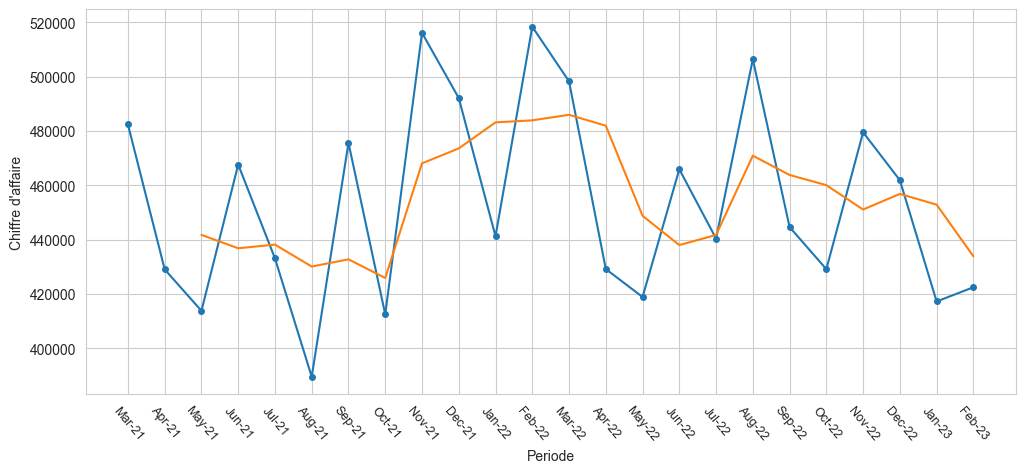

In [1734]:
#Moving average avec plt rolling:
window_size = 3
evolut_catego["moving_average"] = round((evolut_catego["CA_total"].rolling(window=window_size).mean()),2)
# Plot the data and moving average
plt.pyplot.figure(figsize=(12, 5))
plt.pyplot.plot(evolut_catego['period'], evolut_catego['CA_total'], label='CA total', marker='o', markersize=4)
plt.pyplot.plot(evolut_catego['period'], evolut_catego['moving_average'], label=f'Moving Average ({window_size} periods)')
plt.pyplot.xlabel('Periode')
plt.pyplot.xticks(rotation = -50, fontsize=9)
plt.pyplot.ylabel("Chiffre d'affaire")


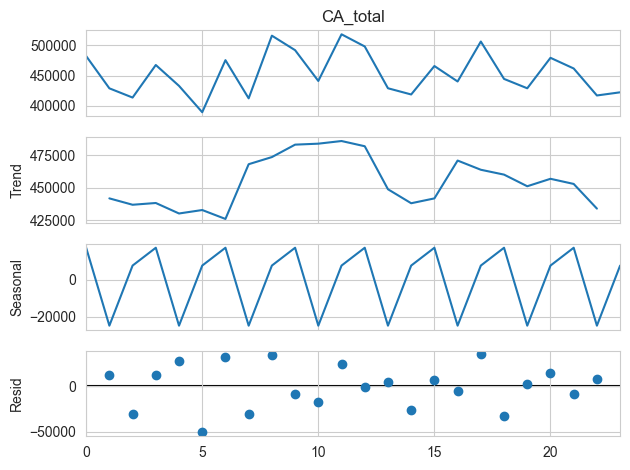

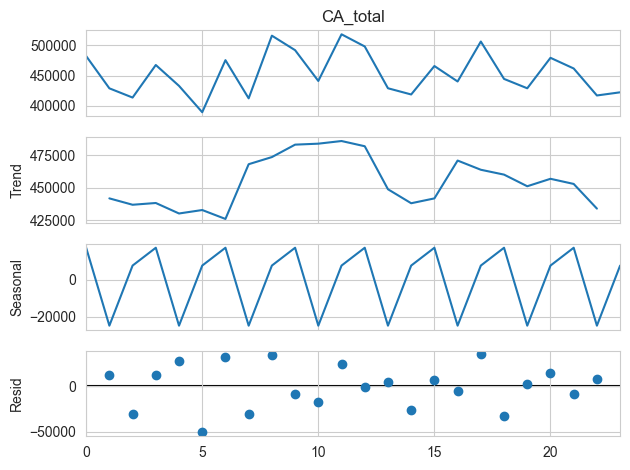

In [1700]:
result = seasonal_decompose(evolut_catego['CA_total'], model='additive', period=3)
result.plot()

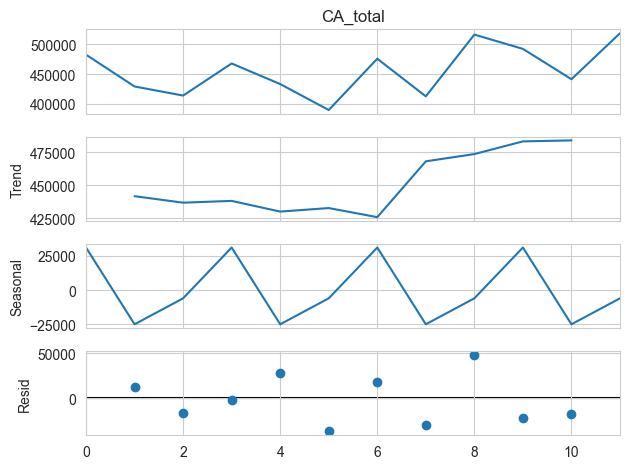

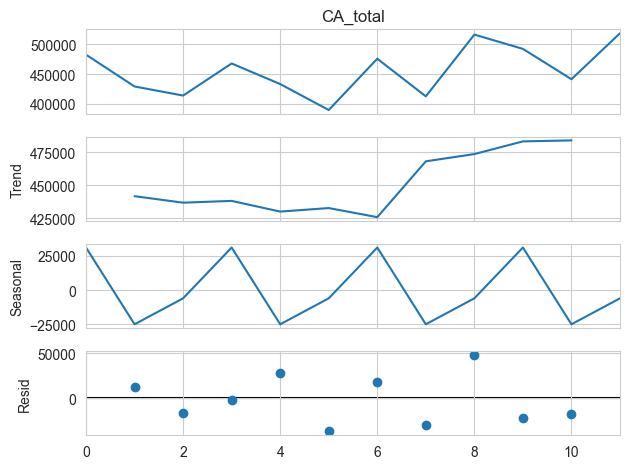

In [2010]:
result = seasonal_decompose(evolut_catego.iloc[0:12,7], model='additive', period=3)
result.plot()

In [ ]:
plt.pyplot.figure(figsize=(10, 5))
sns.barplot(x = evolut_catego['period'], y = evolut_catego["vol_categ_0"], color='steelblue').text(s='Categ_0', x='Nov-22', y=22000.0, color='steelblue', fontsize=9)
sns.barplot(x = evolut_catego['period'], y = evolut_catego["vol_categ_1"], color='darkorange').text(s='Categ_1', x='Nov-22', y=21000.0, color='darkorange', fontsize=9)
sns.barplot(x = evolut_catego['period'], y = evolut_catego["vol_categ_2"], color='green').text(s='Categ_2', x='Nov-22', y=20000.0, color='green', fontsize=9)
plt.pyplot.xticks(rotation = -50, fontsize=9)
plt.pyplot.ylabel('Evolution des ventes en quantité par categorie')
plt.pyplot.xlabel('Mois')

#x='Nov-22', y=260000.0, x='Nov-22', y=250000.0, x='Nov-22', y=240000.0,

Text(0.5, 0, '')

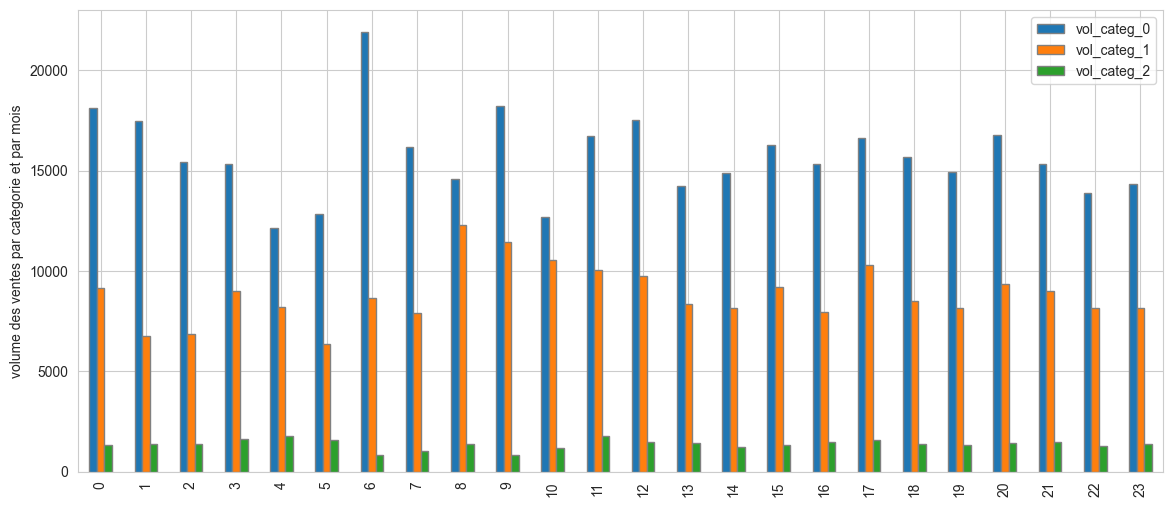

In [1644]:
evolut_catego[["vol_categ_0","vol_categ_1","vol_categ_2"]].plot.bar(figsize=(14,6),edgecolor = "grey")
plt.pyplot.ylabel('volume des ventes par categorie et par mois')
plt.pyplot.xlabel("")

#Il faut determiner les volumes des ventes par categorie et par mois c'est a dire nombre de product id vendu par mois 

Text(0.5, 0, 'Mois')

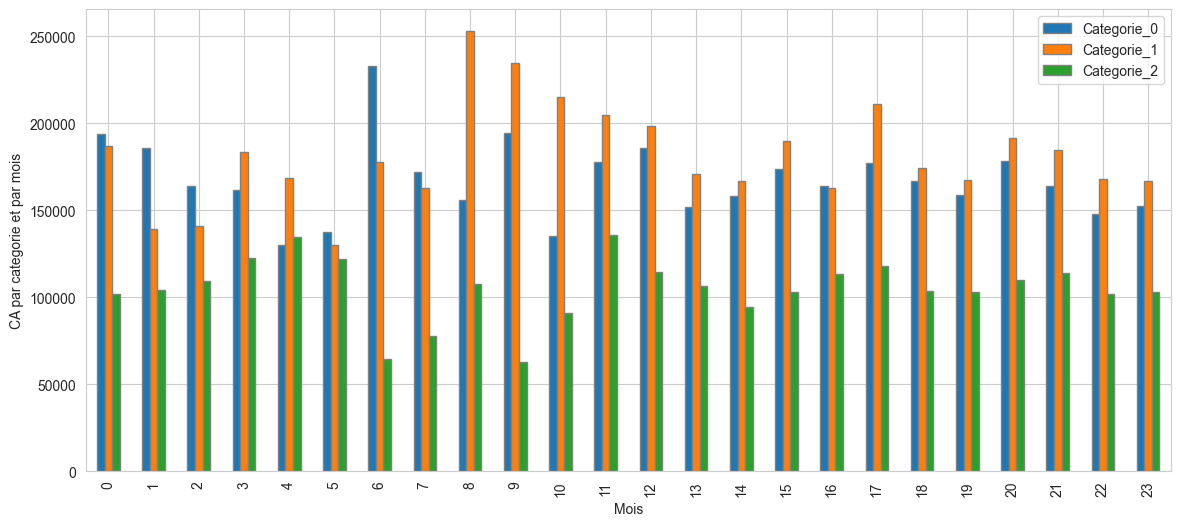

In [1645]:
evolut_catego[["Categorie_0","Categorie_1","Categorie_2"]].plot.bar(figsize=(14,6),edgecolor = "grey")
plt.pyplot.ylabel('CA par categorie et par mois')
plt.pyplot.xlabel('Mois')

In [1998]:
evolut_catego.head(24)

,period,Categorie_0,Categorie_1,Categorie_2,vol_categ_0,vol_categ_1,vol_categ_2,CA_total,moving_average
0,Mar-21,193629.17,186974.17,101837.27,18131,9134,1336,482440.61,NaN
1,Apr-21,185775.05,139065.96,104272.15,17483,6755,1382,429113.16,NaN
2,May-21,163706.06,141060.93,109095.25,15446,6872,1397,413862.24,441805.34
3,Jun-21,161660.08,183599.71,122429.62,15312,8989,1628,467689.41,436888.27
4,Jul-21,130055.59,168343.56,134774.06,12163,8214,1803,433173.21,438241.62
5,Aug-21,137417.91,129934.13,122262.48,12837,6345,1580,389614.52,430159.05
6,Sep-21,233170.99,177797.27,64711.18,21916,8642,823,475679.44,432822.39
7,Oct-21,171839.15,163031.48,77687.86,16190,7900,1036,412558.49,425950.82
8,Nov-21,155909.56,252910.39,107347.78,14600,12316,1395,516167.73,468135.22
9,Dec-21,194574.70,234722.99,62885.78,18216,11464,821,492183.47,473636.56


In [2004]:
evolut_catego.iloc[0:12,7].sum() - evolut_catego.iloc[12:24,7].sum()

57619.23000000045

In [2018]:
print(len(df_customers.loc[2023-df_customers["year_of_birth"] <= 30]),
len(df_customers.loc[(2023-df_customers["year_of_birth"] > 30) & (2023-df_customers["year_of_birth"] <= 60)]),
#len(df_customers.loc[(2023-df_customers["year_of_birth"] > 40) & (2023-df_customers["year_of_birth"] <= 60)]),
len(df_customers.loc[2023-df_customers["year_of_birth"] > 60]))
# repartition de la clientèle en tranches d'age

2092 4866 1663


In [2026]:
go.Figure(data=go.Pie(labels= ['age <= 30', 'age > 30 et <=60', 'age > 60'], 
        values= [len(df_customers.loc[2023-df_customers["year_of_birth"] <= 30]),
                 len(df_customers.loc[(2023-df_customers["year_of_birth"] > 30) & (2023-df_customers["year_of_birth"] <= 60)]),
                 len(df_customers.loc[2023-df_customers["year_of_birth"] > 60])]),
layout_title_text="Distribution des clients en fonction des âges").update_layout(
        title_font_size=12,
        width=500,
        height=400).update_traces(marker=dict(colors=['lightskyblue', 'royalblue', 'navy']))

In [1649]:
categ_et_genre = pd.DataFrame(
    {'period': period,
     'f_categ_0': 0,
     'f_categ_1': 0,
     'f_categ_2': 0,
     'm_categ_0': 0,
     'm_categ_1': 0,
     'm_categ_2': 0
     }) 

In [1650]:
gender_list = ["f", "m"]

In [1651]:
l = 1
for k in range(len(gender_list)):
    
    for n in range(3): 
        
            for j in range(len(list_month)):
                datee = datetime.strptime(list_month[j], "%Y-%m-%d")
                month = datee.month
                year = datee.year
                first, last = calendar.monthrange(year, month)
                if month < 10: 
                    df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
                else:
                    df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
        
                df_month = df_month.loc[df_month["categ"] == n].groupby("client_id").agg(
                    {"transaction_id":"count"}).reset_index().merge(df_customers, on="client_id", how="left")

                categ_et_genre.iloc[j,l] = len(df_month.loc[df_month["gender"] == gender_list[k]])
            l = l+1


In [1652]:
categ_et_genre.head(30)

,period,f_categ_0,f_categ_1,f_categ_2,m_categ_0,m_categ_1,m_categ_2
0,Mar-21,2255,2148,431,2031,1967,412
1,Apr-21,2176,1817,436,1981,1660,407
2,May-21,2037,1811,441,1827,1621,392
3,Jun-21,2105,2151,457,1933,1955,448
4,Jul-21,1962,2048,502,1770,1821,510
5,Aug-21,1913,1706,448,1764,1638,442
6,Sep-21,2269,2069,305,2133,1925,287
7,Oct-21,2126,1807,357,1916,1604,326
8,Nov-21,2086,2471,445,1949,2286,418
9,Dec-21,2216,2385,304,2032,2166,290


In [1707]:

data = pd.DataFrame({'categ': ['categ_0','categ_0','categ_1','categ_1','categ_2','categ_2'],
        'gender': ['m', 'f', 'm', 'f', 'm', 'f']})
 

tableau = pd.crosstab(data['categ'], data['gender'])
print(tableau)

gender   f  m
categ        
categ_0  1  1
categ_1  1  1
categ_2  1  1


In [1729]:
tableau.iloc[0,0] = 2092
tableau.iloc[0,1]= 1915
tableau.iloc[1,0] = 2082
tableau.iloc[1,1] = 1901
tableau.iloc[2,0] = 426
tableau.iloc[2,1] = 402


In [1730]:
print(tableau)

gender      f     m
categ              
categ_0  2092  1915
categ_1  2082  1901
categ_2   426   402


In [1731]:
chi2_contingency(tableau)

#les 2 variables sont indépendantes 

Chi2ContingencyResult(statistic=0.19136225490726191, pvalue=0.9087537464938789, dof=2, expected_freq=array([[2090.29258335, 1916.70741665],
       [2077.77273758, 1905.22726242],
       [ 431.93467907,  396.06532093]]))

Text(0.5, 1.0, 'Quantité de livres achetés en fonction du genre pour la catégorie 0')

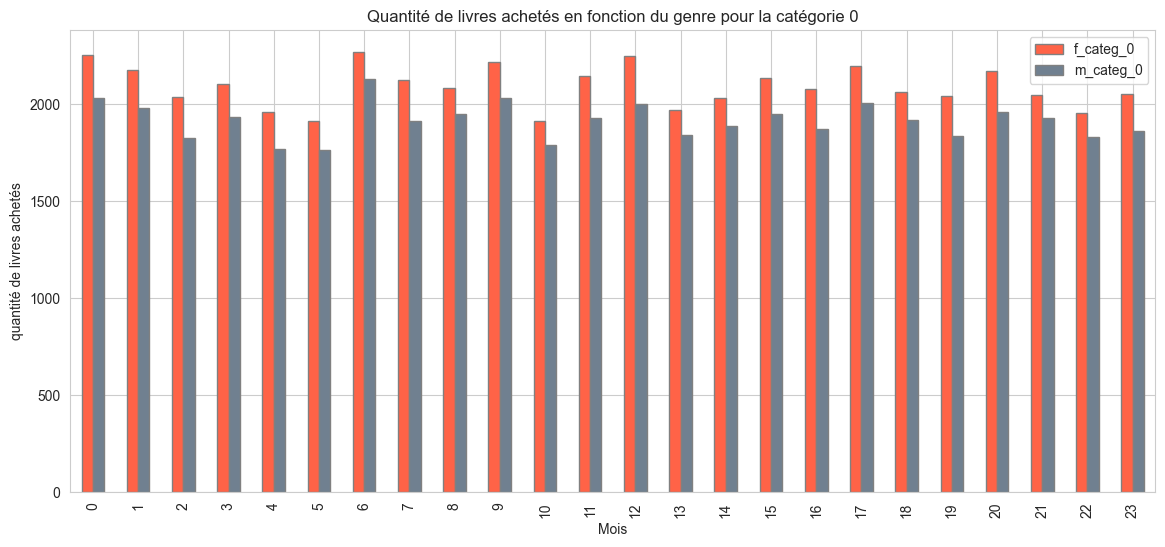

In [1653]:
#genre prédominant au cours des mois pour la catégorie 0 : nombre de product id  
categ_et_genre[["f_categ_0","m_categ_0"]].plot.bar(figsize=(14,6),edgecolor = "grey", color=["tomato","slategray"])
plt.pyplot.ylabel('quantité de livres achetés')
plt.pyplot.xlabel('Mois')
plt.pyplot.title('Quantité de livres achetés en fonction du genre pour la catégorie 0')

#,"f_categ_1", "m_categ_1", "f_categ_2", "m_categ_2"

Text(0.5, 1.0, 'Quantité de livres achetés en fonction du genre pour la catégorie 1')

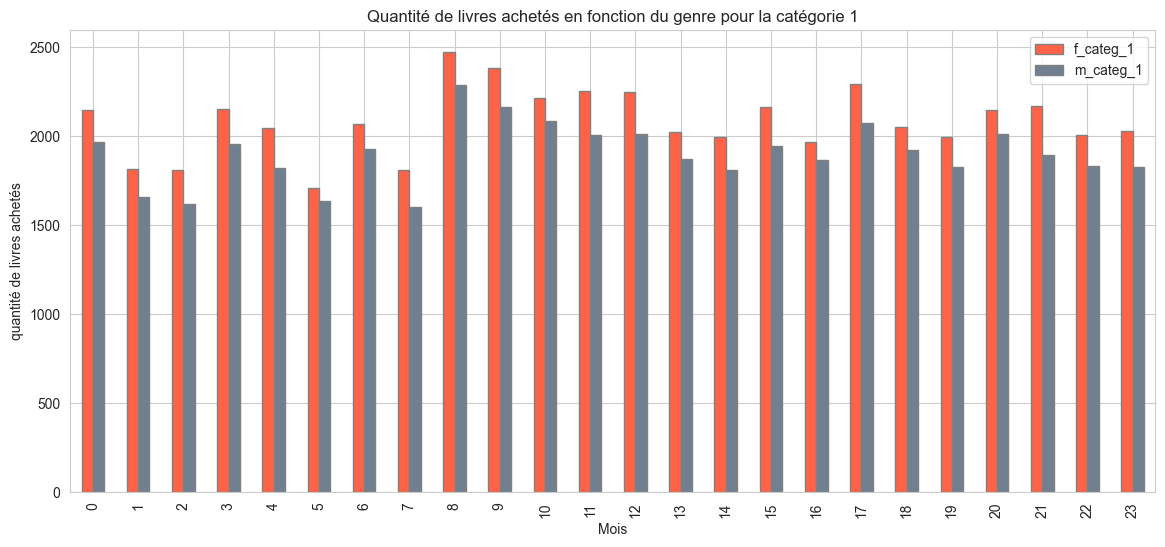

In [1654]:
#genre prédominant au cours des mois pour la catégorie 1 
categ_et_genre[["f_categ_1","m_categ_1"]].plot.bar(figsize=(14,6),edgecolor = "grey", color=["tomato","slategray"])
plt.pyplot.ylabel('quantité de livres achetés')
plt.pyplot.xlabel('Mois')
plt.pyplot.title('Quantité de livres achetés en fonction du genre pour la catégorie 1')
#,"f_categ_1", "m_categ_1", "f_categ_2", "m_categ_2"

Text(0.5, 1.0, 'Quantité de livres achetés en fonction du genre pour la catégorie 2')

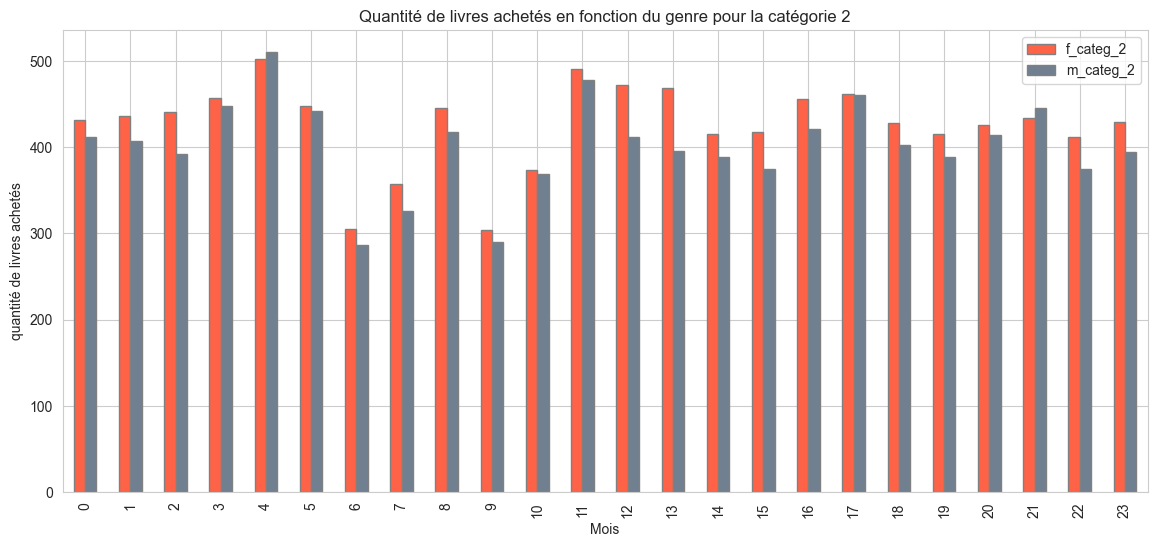

In [1655]:
#genre prédominant au cours des mois pour la catégorie 2 

categ_et_genre[["f_categ_2","m_categ_2"]].plot.bar(figsize=(14,6),edgecolor = "grey", color=["tomato","slategray"])
plt.pyplot.ylabel('quantité de livres achetés')
plt.pyplot.xlabel('Mois')
plt.pyplot.title('Quantité de livres achetés en fonction du genre pour la catégorie 2')
#,"f_categ_1", "m_categ_1", "f_categ_2", "m_categ_2"

In [1201]:
#Distribution des ages des clients : 
distrib_age = df_customers.groupby("year_of_birth").agg({"client_id" : "count"}).reset_index()

In [1203]:
distrib_age["age"] = 2023 - distrib_age["year_of_birth"]

In [1206]:
distrib_age.rename(columns={"client_id" : "client_count"}, inplace=True)

In [1215]:
go.Figure(data=go.Bar(
    x=distrib_age["age"],
    y=distrib_age["client_count"]),
          layout_title_text="répartition des clients en fonction de leurs âges").update_yaxes(title_text="nombre de clients")

In [ ]:
#fréquence des achats : 

datee = datetime.strptime(list_month[4], "%Y-%m-%d")
month = datee.month
year = datee.year
first, last = calendar.monthrange(year, month)
df_month = df_final.loc[(df_final['date_transaction'] > datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] < datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
#df_month = df_month.loc[df_month["categ"] == 0].groupby("client_id").agg(
                    #{"product_id":"count"}).reset_index().merge(df_customers, on="client_id", how="left")


In [1656]:
frequence_achat = pd.DataFrame({'client_id': identifiant_client,
                              'nbre_session_mars_2021': 0.0,
                              'nbre_session_avril_2021': 0.0,
                              'nbre_session_mai_2021': 0.0,
                              'nbre_session_juin_2021': 0.0,
                              'nbre_session_juillet_2021': 0.0,
                              'nbre_session_aout_2021': 0.0,
                              'nbre_session_septembre_2021': 0.0,
                              'nbre_session_octobre_2021': 0.0,
                              'nbre_session_novembre_2021': 0.0,
                              'nbre_session_decembre_2021': 0.0,
                              'nbre_session_janvier_2022': 0.0,
                              'nbre_session_fevrier_2022': 0.0,
                              'nbre_session_mars_2022': 0.0,
                              'nbre_session_avril_2022': 0.0,
                              'nbre_session_mai_2022': 0.0,
                              'nbre_session_juin_2022': 0.0,
                              'nbre_session_juillet_2022': 0.0,
                              'nbre_session_aout_2022': 0.0,
                              'nbre_session_septembre_2022': 0.0,
                              'nbre_session_octobre_2022': 0.0,
                              'nbre_session_novembre_2022': 0.0,
                              'nbre_session_decembre_2022': 0.0,
                              'nbre_session_janvier_2023': 0.0,
                              'nbre_session_fevrier_2023': 0.0})

In [1657]:
for j in range(len(list_month)):
                datee = datetime.strptime(list_month[j], "%Y-%m-%d")
                month = datee.month
                year = datee.year
                first, last = calendar.monthrange(year, month)
                if month < 10: 
                    df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-0'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-0'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
                else:
                    df_month = df_final.loc[(df_final['date_transaction'] >= datetime.strptime((str(year)+'-'+str(month)+'-0'+str(first+1))[:10],'%Y-%m-%d'))
                     & (df_final['date_transaction'] <= datetime.strptime((str(year)+'-'+str(month)+'-'+str(last))[:10],'%Y-%m-%d'))]
        
                for i in range(len(frequence_achat)):
                    frequence_achat.iloc[i,j+1] = len(df_month.loc[df_month["client_id"] == frequence_achat.iloc[i,0]]["session_id"].unique())

In [1658]:
frequence_achat = pd.merge(frequence_achat, df_customers, on="client_id", how="left")

In [1659]:
frequence_achat.head()

,client_id,nbre_session_mars_2021,nbre_session_avril_2021,nbre_session_mai_2021,nbre_session_juin_2021,nbre_session_juillet_2021,nbre_session_aout_2021,nbre_session_septembre_2021,nbre_session_octobre_2021,nbre_session_novembre_2021,...,nbre_session_juillet_2022,nbre_session_aout_2022,nbre_session_septembre_2022,nbre_session_octobre_2022,nbre_session_novembre_2022,nbre_session_decembre_2022,nbre_session_janvier_2023,nbre_session_fevrier_2023,gender,year_of_birth
0,c_329,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,...,3.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,f,1967
1,c_664,5.0,4.0,1.0,4.0,3.0,2.0,2.0,2.0,4.0,...,5.0,5.0,5.0,3.0,3.0,6.0,5.0,4.0,m,1960
2,c_580,8.0,5.0,6.0,4.0,5.0,3.0,6.0,4.0,5.0,...,5.0,5.0,6.0,3.0,10.0,3.0,8.0,6.0,m,1988
3,c_7912,9.0,8.0,5.0,4.0,4.0,4.0,1.0,2.0,6.0,...,2.0,5.0,3.0,2.0,4.0,5.0,3.0,3.0,f,1989
4,c_2033,5.0,3.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,...,1.0,5.0,2.0,2.0,0.0,3.0,1.0,6.0,f,1956


In [1666]:
frequence_achat["freq_moy"] = 0

In [1736]:
for i in range(len(frequence_achat)):
    frequence_achat.iloc[i,27]= round(frequence_achat.iloc[i,1:25].mean())

In [1737]:
frequence_achat.head()

,client_id,nbre_session_mars_2021,nbre_session_avril_2021,nbre_session_mai_2021,nbre_session_juin_2021,nbre_session_juillet_2021,nbre_session_aout_2021,nbre_session_septembre_2021,nbre_session_octobre_2021,nbre_session_novembre_2021,...,nbre_session_septembre_2022,nbre_session_octobre_2022,nbre_session_novembre_2022,nbre_session_decembre_2022,nbre_session_janvier_2023,nbre_session_fevrier_2023,gender,year_of_birth,freq_moy,age
0,c_329,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,1.0,f,1967,1,56
1,c_664,5.0,4.0,1.0,4.0,3.0,2.0,2.0,2.0,4.0,...,5.0,3.0,3.0,6.0,5.0,4.0,m,1960,4,63
2,c_580,8.0,5.0,6.0,4.0,5.0,3.0,6.0,4.0,5.0,...,6.0,3.0,10.0,3.0,8.0,6.0,m,1988,5,35
3,c_7912,9.0,8.0,5.0,4.0,4.0,4.0,1.0,2.0,6.0,...,3.0,2.0,4.0,5.0,3.0,3.0,f,1989,4,34
4,c_2033,5.0,3.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,...,2.0,2.0,0.0,3.0,1.0,6.0,f,1956,2,67


In [1738]:
frequence_achat.nlargest(20, "nbre_session_mars_2021").head()


,client_id,nbre_session_mars_2021,nbre_session_avril_2021,nbre_session_mai_2021,nbre_session_juin_2021,nbre_session_juillet_2021,nbre_session_aout_2021,nbre_session_septembre_2021,nbre_session_octobre_2021,nbre_session_novembre_2021,...,nbre_session_septembre_2022,nbre_session_octobre_2022,nbre_session_novembre_2022,nbre_session_decembre_2022,nbre_session_janvier_2023,nbre_session_fevrier_2023,gender,year_of_birth,freq_moy,age
6,c_1609,436.0,407.0,420.0,404.0,361.0,335.0,487.0,388.0,487.0,...,424.0,391.0,433.0,444.0,368.0,399.0,m,1980,418,43
32,c_3454,218.0,209.0,206.0,198.0,182.0,164.0,223.0,107.0,231.0,...,201.0,197.0,203.0,217.0,197.0,201.0,m,1969,210,54
107,c_4958,158.0,139.0,137.0,164.0,165.0,149.0,115.0,75.0,165.0,...,135.0,150.0,163.0,168.0,118.0,132.0,m,1999,146,24
135,c_6714,104.0,95.0,107.0,107.0,81.0,65.0,115.0,97.0,110.0,...,80.0,94.0,102.0,124.0,94.0,93.0,f,1968,98,55
5,c_4908,11.0,4.0,3.0,4.0,1.0,5.0,5.0,2.0,3.0,...,8.0,3.0,4.0,4.0,4.0,5.0,f,1981,5,42


In [1670]:
frequence_achat["age"] = 2023 - frequence_achat["year_of_birth"]

In [1671]:
frequence_achat.head()

,client_id,nbre_session_mars_2021,nbre_session_avril_2021,nbre_session_mai_2021,nbre_session_juin_2021,nbre_session_juillet_2021,nbre_session_aout_2021,nbre_session_septembre_2021,nbre_session_octobre_2021,nbre_session_novembre_2021,...,nbre_session_septembre_2022,nbre_session_octobre_2022,nbre_session_novembre_2022,nbre_session_decembre_2022,nbre_session_janvier_2023,nbre_session_fevrier_2023,gender,year_of_birth,freq_moy,age
0,c_329,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,1.0,f,1967,1,56
1,c_664,5.0,4.0,1.0,4.0,3.0,2.0,2.0,2.0,4.0,...,5.0,3.0,3.0,6.0,5.0,4.0,m,1960,4,63
2,c_580,8.0,5.0,6.0,4.0,5.0,3.0,6.0,4.0,5.0,...,6.0,3.0,10.0,3.0,8.0,6.0,m,1988,5,35
3,c_7912,9.0,8.0,5.0,4.0,4.0,4.0,1.0,2.0,6.0,...,3.0,2.0,4.0,5.0,3.0,3.0,f,1989,4,34
4,c_2033,5.0,3.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,...,2.0,2.0,0.0,3.0,1.0,6.0,f,1956,2,67


In [1287]:
distrib_age.head()

,year_of_birth,client_count,age
0,1929,3,94
1,1930,4,93
2,1931,4,92
3,1932,6,91
4,1933,8,90


In [1288]:
distrib_age["frequence_moyenne"] = 0

In [1302]:

for i in range (len(distrib_age)):
    x = 0 
    for j in range (1,25):
        df = frequence_achat.iloc[:,[0,j,26]].loc[frequence_achat["year_of_birth"] == distrib_age.iloc[i,0]]
        x = x +(round(df.iloc[:,1].mean()))
    distrib_age.iloc[i,3] = x     

In [1675]:
stats.spearmanr(frequence_achat["age"], frequence_achat["freq_moy"])

SignificanceResult(statistic=0.2063334374492564, pvalue=2.4623995443053336e-83)

In [ ]:
colors= ['green'] * 8600
go.Figure(data=go.Scatter(
    x=frequence_achat["age"],
    y=frequence_achat["freq_moy"],
    mode = 'markers',
    marker_color=colors),
          layout_title_text="fréquence d'achats en fonction des âges sur toute la période").update_yaxes(title_text="fréquence d'achats")

In [1764]:
frequence_achat.nlargest(4, "freq_moy")

,client_id,nbre_session_mars_2021,nbre_session_avril_2021,nbre_session_mai_2021,nbre_session_juin_2021,nbre_session_juillet_2021,nbre_session_aout_2021,nbre_session_septembre_2021,nbre_session_octobre_2021,nbre_session_novembre_2021,...,nbre_session_septembre_2022,nbre_session_octobre_2022,nbre_session_novembre_2022,nbre_session_decembre_2022,nbre_session_janvier_2023,nbre_session_fevrier_2023,gender,year_of_birth,freq_moy,age
6,c_1609,436.0,407.0,420.0,404.0,361.0,335.0,487.0,388.0,487.0,...,424.0,391.0,433.0,444.0,368.0,399.0,m,1980,418,43
32,c_3454,218.0,209.0,206.0,198.0,182.0,164.0,223.0,107.0,231.0,...,201.0,197.0,203.0,217.0,197.0,201.0,m,1969,210,54
107,c_4958,158.0,139.0,137.0,164.0,165.0,149.0,115.0,75.0,165.0,...,135.0,150.0,163.0,168.0,118.0,132.0,m,1999,146,24
135,c_6714,104.0,95.0,107.0,107.0,81.0,65.0,115.0,97.0,110.0,...,80.0,94.0,102.0,124.0,94.0,93.0,f,1968,98,55


In [1768]:
df = df.drop(df[df.client_id == 'c_6714'].index)
#enlever le B to B 

In [ ]:
colors= ['green'] * 8600
go.Figure(data=go.Scatter(
    x=df["age"],
    y=df["freq_moy"],
    mode = 'markers',
    marker_color=colors),
          layout_title_text="fréquence d'achats en fonction des âges sur toute la période").update_yaxes(title_text="fréquence d'achats")

In [1703]:
#data = pd.merge(df_transactions.groupby("client_id").agg({"product_id":"count"}).reset_index(), df_customers, on='client_id', how='left')

,client_id,product_id,gender,year_of_birth
0,c_1,43,m,1955
1,c_10,58,m,1956
2,c_100,8,m,1992
3,c_1000,126,f,1966
4,c_1001,103,m,1982
...,...,...,...,...
8595,c_995,14,m,1955
8596,c_996,96,f,1970
8597,c_997,59,f,1994
8598,c_998,55,m,2001


In [ ]:
#Perform simple exponential smoothing
#model = sm.tsa.SimpleExpSmoothing(CA_total['CA_total_mois'])
#ses_model = model.fit(smoothing_level=0.3)
#CA_total['Forecast'] = ses_model.fittedvalues
# Plotting
#plt.pyplot.figure(figsize=(10, 6))
#plt.pyplot.plot(CA_total['CA_total_mois'], label='Actual Sales', marker='o', markersize=4)
#plt.pyplot.plot(CA_total['Forecast'], label='Forecast')
#plt.pyplot.xlabel('Month')
#plt.pyplot.ylabel('Sales')
#plt.title('Simple Exponential Smoothing Forecast')
#plt.pyplot.legend()


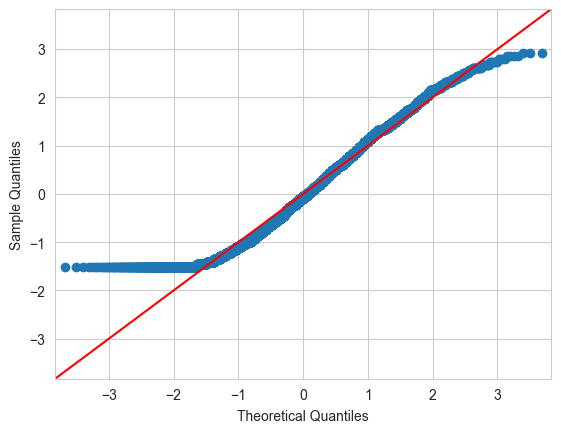

<Figure size 500x500 with 0 Axes>

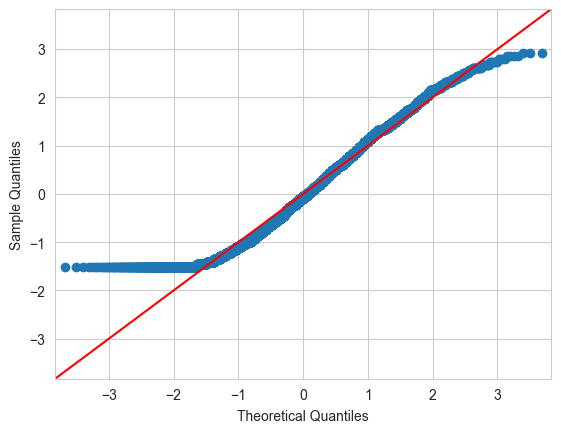

In [1781]:
sm.qqplot(2023 - df_customers["year_of_birth"], line='45', fit=True)

In [2040]:
#correlation entre age du client et categorie du livre : test de kruskal wallis


new_df = pd.merge(pd.merge(df_transactions, df_customers, on="client_id", how="left"), df_products, on="product_id", how="left")


In [2041]:
new_df = new_df.drop(columns=["date_heure_transaction", "session_id", "transaction_id", "price"])


In [2043]:
new_df["age"] = 2023 - new_df["year_of_birth"]

In [2045]:
new_df.loc[new_df["categ"] == 0]

,product_id,client_id,date_transaction,gender,year_of_birth,categ,age
0,0_1259,c_329,2021-03-01,f,1967,0,56
1,0_1390,c_664,2021-03-01,m,1960,0,63
2,0_1352,c_580,2021-03-01,m,1988,0,35
3,0_1458,c_7912,2021-03-01,f,1989,0,34
4,0_1358,c_2033,2021-03-01,f,1956,0,67
...,...,...,...,...,...,...,...
687523,0_1435,c_7481,2023-02-28,m,1986,0,37
687524,0_1039,c_7144,2023-02-28,f,1984,0,39
687527,0_998,c_4476,2023-02-28,f,1977,0,46
687532,0_1547,c_4848,2023-02-28,m,1953,0,70


In [2054]:
categ_0 = new_df.loc[new_df["categ"] == 0].drop_duplicates(subset='client_id', keep='first').loc[:,"age"]

In [2053]:
categ_1 = new_df.loc[new_df["categ"] == 1].drop_duplicates(subset='client_id', keep='first').loc[:,"age"]

In [2055]:
categ_2 = new_df.loc[new_df["categ"] == 2].drop_duplicates(subset='client_id', keep='first').loc[:,"age"]

In [2056]:
stats.kruskal(categ_0, categ_1, categ_2)

KruskalResult(statistic=1250.0719347083564, pvalue=3.550817789517929e-272)